In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Przygotowanie danych:

In [2]:
df = pd.read_csv('data.csv')
del df['id']
df = df[df['gender'].map(lambda x: str(x) != "Other")]
df = df.dropna()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 498
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             454 non-null    object 
 1   age                454 non-null    float64
 2   hypertension       454 non-null    int64  
 3   heart_disease      454 non-null    int64  
 4   ever_married       454 non-null    object 
 5   work_type          454 non-null    object 
 6   Residence_type     454 non-null    object 
 7   avg_glucose_level  454 non-null    float64
 8   bmi                454 non-null    float64
 9   smoking_status     454 non-null    object 
 10  stroke             454 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 42.6+ KB


gender   age  hypertension  heart_disease ever_married      work_type  \
0      Male  67.0             0              1          Yes        Private   
2      Male  80.0             0              1          Yes        Private   
3    Female  49.0             0              0          Yes        Private   
4    Female  79.0             1              0          Yes  Self-employed   
5      Male  81.0             0              0          Yes        Private   
..      ...   ...           ...            ...          ...            ...   
494  Female  55.0             0              0          Yes        Private   
495  Female  71.0             0              0          Yes        Private   
496    Male   5.0             0              0           No       children   
497  Female  14.0             0              0           No       children   
498  Female  15.0             0              0           No       children   

    Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0            Urban             228.69  36.6  formerly smoked       1  
2            Rural             105.92  32.5     never smoked       1  
3            Urban             171.23  34.4           smokes       1  
4            Rural             174.12  24.0     never smoked       1  
5            Urban             186.21  29.0  formerly smoked       1  
..             ...                ...   ...              ...     ...  
494          Rural             111.19  39.7  formerly smoked       0  
495          Urban              93.28  34.7     never smoked       0  
496          Rural             122.19  35.0          Unknown       0  
497          Rural             129.53  21.3     never smoked       0  
498          Rural             114.53  29.1          Unknown       0  

[454 rows x 11 columns]

In [3]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df = pd.get_dummies(df, columns=['ever_married'], drop_first=True)
df = pd.get_dummies(df, columns=['work_type'], drop_first=True)
df = pd.get_dummies(df, columns=['Residence_type'], drop_first=True)
df = pd.get_dummies(df, columns=['smoking_status'], drop_first=True)

df

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0    67.0             0              1             228.69  36.6       1   
2    80.0             0              1             105.92  32.5       1   
3    49.0             0              0             171.23  34.4       1   
4    79.0             1              0             174.12  24.0       1   
5    81.0             0              0             186.21  29.0       1   
..    ...           ...            ...                ...   ...     ...   
494  55.0             0              0             111.19  39.7       0   
495  71.0             0              0              93.28  34.7       0   
496   5.0             0              0             122.19  35.0       0   
497  14.0             0              0             129.53  21.3       0   
498  15.0             0              0             114.53  29.1       0   

     gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0              1                 1                       0                  1   
2              1                 1                       0                  1   
3              0                 1                       0                  1   
4              0                 1                       0                  0   
5              1                 1                       0                  1   
..           ...               ...                     ...                ...   
494            0                 1                       0                  1   
495            0                 1                       0                  1   
496            1                 0                       0                  0   
497            0                 0                       0                  0   
498            0                 0                       0                  0   

     work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                          0                   0                     1   
2                          0                   0                     0   
3                          0                   0                     1   
4                          1                   0                     0   
5                          0                   0                     1   
..                       ...                 ...                   ...   
494                        0                   0                     0   
495                        0                   0                     1   
496                        0                   1                     0   
497                        0                   1                     0   
498                        0                   1                     0   

     smoking_status_formerly smoked  smoking_status_never smoked  \
0                                 1                            0   
2                                 0                            1   
3                                 0                            0   
4                                 0                            1   
5                                 1                            0   
..                              ...                          ...   
494                               1                            0   
495                               0                            1   
496                               0                            0   
497                               0                            1   
498                               0                            0   

     smoking_status_smokes  
0                        0  
2                        0  
3                        1  
4                        0  
5                        0  
..                     ...  
494                      0  
495                      0  
496                      0  
497                      0  
498                      0  

[454 rows x 16 columns]

In [4]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['stroke'])

In [5]:
df_train['stroke'].value_counts(dropna=False)

0    196
1    167
Name: stroke, dtype: int64

In [6]:
df_test['stroke'].value_counts(dropna=False)

0    49
1    42
Name: stroke, dtype: int64

# Wizualizacja

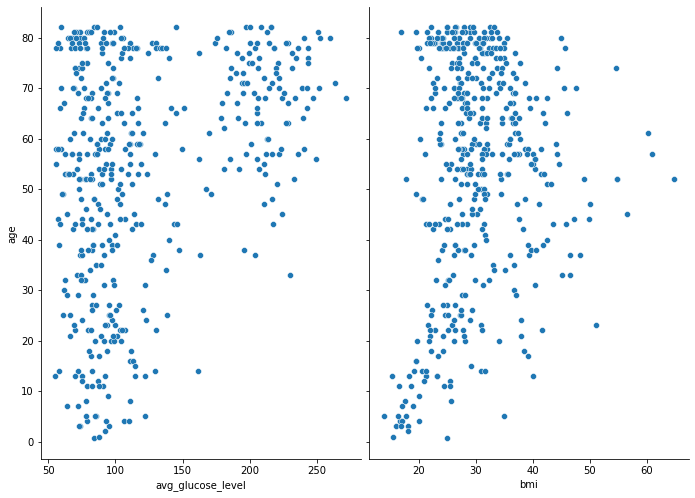

In [7]:
sns.pairplot(df, x_vars=['avg_glucose_level','bmi'], y_vars='age', height=7, aspect=0.7, diag_kind = None)

In [8]:
features = {'Smoker': df['smoking_status_smokes'].values,
     'Male': df['gender_Male'].values,
     'Urban': df['Residence_type_Urban']}
df_vis = pd.DataFrame(features)

fig = make_subplots(rows=1, cols=3, subplot_titles=('Smoker', 'Male', 'Urban'))
L= len(df_vis)

cnames = list(df_vis.columns)
for k, name in enumerate(cnames):
    n_true = df_vis[name].sum()
    fig.add_trace(go.Bar(x=['False', 'True'], y=[n_true, L-n_true], name=name ), 1,k+1)
fig.update_layout(barmode='relative',  bargap=0.05, width=700, height=400)

# Regresja liniowa

In [9]:
X_cols = list(set(df_train.columns) - {'stroke'})
y_cols = 'stroke'

X_train_lin = df_train[X_cols]
y_train_lin = df_train[y_cols]

X_test_lin = df_test[X_cols]
y_test_lin = df_test[y_cols]

clf_lin = LinearRegression().fit(X_train_lin, y_train_lin)
test_pred_lin = clf_lin.predict(X_test_lin)

In [10]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [11]:
test_pred_lin = np.round(np.clip(test_pred_lin, 0, 1))
regression_results(y_test_lin, test_pred_lin)

explained_variance:  0.0292
mean_squared_log_error:  0.1162
r2:  0.0272
MAE:  0.2418
MSE:  0.2418
RMSE:  0.4917


In [12]:
print(metrics.classification_report(y_test_lin, test_pred_lin))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        49
           1       0.73      0.76      0.74        42

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [13]:
test_pred_lin

array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0.])

In [14]:
y_test_lin.values

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

# Regresja logistyczna

In [15]:
num_cols = ['age', 'avg_glucose_level', 'bmi']
cat_cols = list(set(df.columns) - {'stroke', 'age', 'avg_glucose_level', 'bmi'})

scaler = StandardScaler()
scaler.fit(df_train[num_cols])

X_num_train = scaler.transform(df_train[num_cols])
X_cat_train = df_train[cat_cols].to_numpy()
X_train = np.hstack((X_num_train, X_cat_train))
y_train = df_train['stroke']

X_num_test = scaler.transform(df_test[num_cols])
X_cat_test = df_test[cat_cols].to_numpy()
X_test = np.hstack((X_num_test, X_cat_test))
y_test = df_test['stroke']

In [16]:
clf_log = LogisticRegression()

clf_log.fit(X_train, y_train)

test_pred_log  = clf_log.predict(X_test)

regression_results(y_test, test_pred_log)

explained_variance:  -0.0165
mean_squared_log_error:  0.1214
r2:  -0.017
MAE:  0.2527
MSE:  0.2527
RMSE:  0.5027


In [17]:
print('\nClassification Report')
print(metrics.classification_report(y_test, test_pred_log))


Classification Report
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.72      0.74      0.73        42

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



In [18]:
test_pred_log

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [19]:
y_test.values

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

# Naiwny Bayes

In [20]:
gnb = GaussianNB()

gnb = gnb.fit(X_train, y_train)

test_pred_bay  = gnb.predict(X_test)

regression_results(y_test, test_pred_bay)

explained_variance:  0.2187
mean_squared_log_error:  0.1003
r2:  0.1599
MAE:  0.2088
MSE:  0.2088
RMSE:  0.4569


In [21]:
print('\nClassification Report')
print(metrics.classification_report(y_test, test_pred_bay))


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.69      0.78        49
           1       0.72      0.90      0.80        42

    accuracy                           0.79        91
   macro avg       0.81      0.80      0.79        91
weighted avg       0.81      0.79      0.79        91



In [22]:
test_pred_bay

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [23]:
y_test.values

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)